In [1]:
#   This notebook deomnstrate the reading of the MO matrix and the transition density matrices from NEXMD
# ("vhf.out" and "transition-densities.out" files respectively), then it calculates the GS density, an excited 
# state density, and the transition density matrix between two excited states

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import os
os.chdir('/Users/victormanuelfreixaslemus/Desktop/Projects/Git_portafolio/STO_Gaussian_overlaps/STO_Gaussian_overlaps')
from src.densities.get_MO_from_NEXMD import get_MO_from_NEXMD
from src.densities.get_TDM_from_NEXMD import get_TDM_from_NEXMD

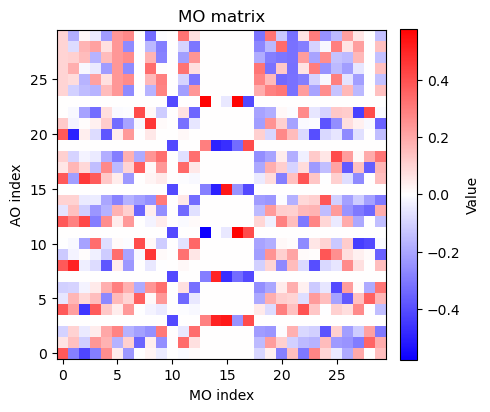

In [2]:
# This cell reads the MO matrix from the NEXMD output ("vhf.out")

debug = True

vhfFileName = "examples/Benzene_run_NEXMD_custom_vhf/vhf.out"
timeStep = 1
mo = get_MO_from_NEXMD(vhfFileName, timeStep)

# Plotting the MO matrix:
if debug:
    vmax = np.max(np.abs(mo))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#0d00ff"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#ff0303"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(mo, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("MO matrix", fontsize=12)
    plt.xlabel("MO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()


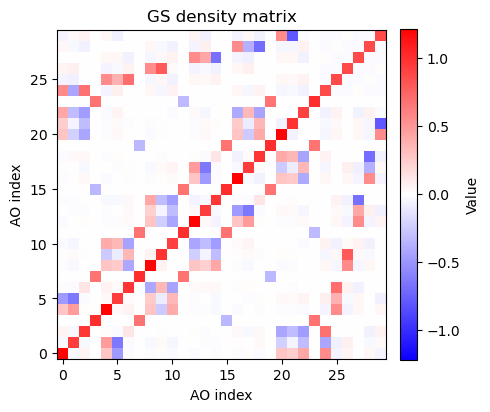

In [3]:
# Calculating and plotting the GS density in the AO basis

debug = True

nOcc = 15
gsDensity = 2 * mo[:, :nOcc] @ mo[:, :nOcc].T

if debug:
    vmax = np.max(np.abs(gsDensity))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#0d00ff"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#ff0303"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(gsDensity, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("GS density matrix", fontsize=12)
    plt.xlabel("AO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()

In [4]:
# Exporting the GS density matrix

np.savetxt("examples/Densities_output/GS_density.txt", gsDensity, fmt="%.6f")

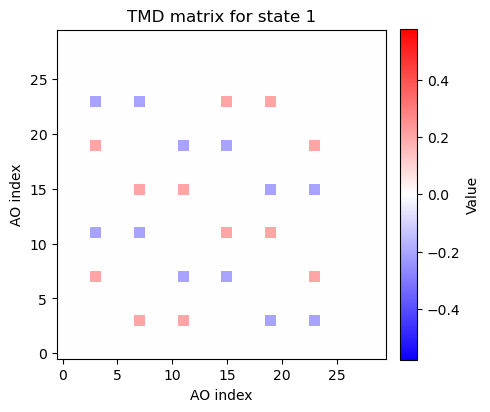

In [5]:
# This cells reads the TDM from NEXMD

debug = True

tdmFile = "examples/Benzene_run_NEXMD_custom_vhf/transition-densities.out"
state = 1
timeStep = 0
printTDM = True
tdm1 = get_TDM_from_NEXMD(tdmFile, state, timeStep, printTDM)

# Plotting the TDM matrix:
if debug:
    vmax = np.max(np.abs(mo))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#0d00ff"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#ff0303"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(tdm1, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("TMD matrix for state 1", fontsize=12)
    plt.xlabel("AO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()


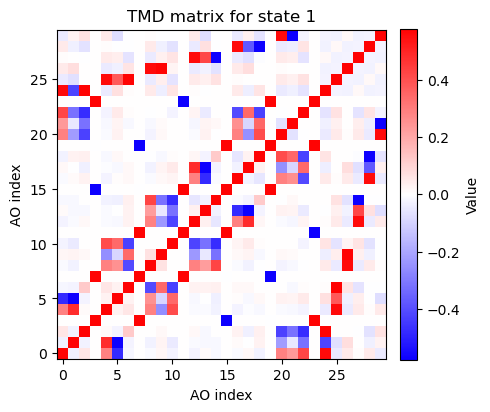

In [6]:
# This cell calculates and plot the density of stste 1

debug = True

density1 = gsDensity + 2 * (tdm1.T @ tdm1 - tdm1 @ tdm1.T)

# Plotting the density for state 1:
if debug:
    vmax = np.max(np.abs(mo))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#0d00ff"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#ff0303"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(density1, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("TMD matrix for state 1", fontsize=12)
    plt.xlabel("AO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()



In [7]:
# Exporting the density of state 1

np.savetxt("examples/Densities_output/Density_001.txt", density1, fmt="%.6f")

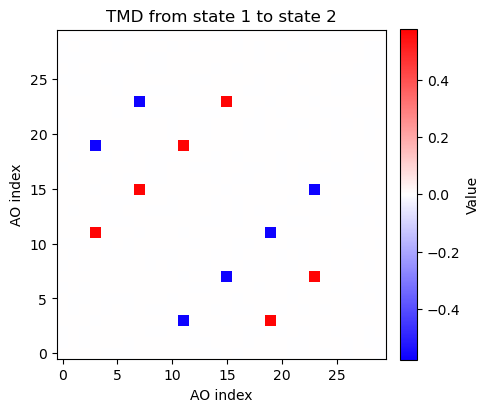

In [8]:
# This cell calculates and plots the TDM between two excited states (1 and 2)

debug = True

tdmFile = "examples/Benzene_run_NEXMD_custom_vhf/transition-densities.out"
state1 = 1
timeStep = 0
printTDM = True
tdm1 = get_TDM_from_NEXMD(tdmFile, state1, timeStep, printTDM)
tdmFile = "examples/Benzene_run_NEXMD_custom_vhf/transition-densities.out"
state2 = 2
timeStep = 0
printTDM = True
tdm2 = get_TDM_from_NEXMD(tdmFile, state2, timeStep, printTDM)

tdm_1_2 = 2 * (tdm1.T @ tdm2 - tdm1 @ tdm2.T)

# Plotting the TDM from state 1 to state 2:
if debug:
    vmax = np.max(np.abs(mo))
    vmin = -vmax
    cmap = LinearSegmentedColormap.from_list(
        "bwr_custom",
        [
            (0.0,  "#0d00ff"),  # deep blue
            (0.5,  "#ffffff"),  # white at zero
            (1.0,  "#ff0303"),  # deep red
        ],
        N=256
    )
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0.0, vmax=vmax)
    plt.figure(figsize=(5, 5))
    im = plt.imshow(tdm_1_2, cmap=cmap, norm=norm, origin='lower', aspect='equal')
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label("Value", fontsize=10)
    plt.title("TMD from state 1 to state 2", fontsize=12)
    plt.xlabel("AO index", fontsize=10)
    plt.ylabel("AO index", fontsize=10)
    plt.tight_layout()
    plt.show()

In [9]:
# Exporting the TDM from state 1 to state 2

np.savetxt("examples/Densities_output/TDM_001_002.txt", tdm_1_2, fmt="%.6f")